<a href="https://colab.research.google.com/github/iammhk/Maximal-Entropy-Random-Walk/blob/master/MERW_DoubleSlit_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#from sympy import Matrix

In [13]:
size=65 #please keep an odd number
q=0.1
n = 1000 #n is the number of steps(increase in the value of n increses the compelxity of graph)
no_walker=50
midpnt = 1 * (size - 1) / 2
projection=[]
#walk_x = np.full ((n), 3 ) # x and y are arrays which store the coordinates of the position
#walk_y = np.full ((n), 3 )

direction=["U","D","L","R"] # Assuming the four directions of movement.
#np.random.seed(10)

In [14]:
class walker:
  
  def __init__(self, walk_x, walk_y, alive):
     
        # Instance Variable    
        self.walk_x=walk_x
        self.walk_y=walk_y
        self.alive = alive

In [15]:
walkers=[]
for i in range(no_walker):
    wlkr = walker([int(size/4)],[int(size/2)],1)
    #if (i%2==0): wlkr = walker([int(size/2)],[int(size/2+5)],1)
    #else : wlkr = walker([int(size/2)],[int(size/2-5)],1)
    walkers.append(wlkr)
#print(walkers[0].walk_x, walkers[1].walk_x)

In [16]:
def adj(s):
    vector = np.zeros(s)
    vector[1]= 1
    vector[-1]= 1
    offdi = la.circulant(vector) #for periodic boundary
    #offdi = la.toeplitz([0,1,0,0,0]) #for non-periodic boundary
    I = np.eye(s)
    a = np.kron(offdi, I) + np.kron(I, offdi)
    #print(a)
    return a


def make_matrix(rows, cols):
    n = rows*cols
    M = np.zeros([n,n])
    for r in range(rows):
        for c in range(cols):
            i = r*cols + c
            # Two inner diagonals
            if c > 0: M[i-1,i] = M[i,i-1] = 1
            # Two outer diagonals
            if r > 0: M[i-cols,i] = M[i,i-cols] = 1
    return (M)

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def add_defects(a,d):
    D = int(d * size * size)

    print(" Total Defects: ",D )
    for i in range(D):
        x = np.random.randint(0,size*size)
        #print(x)
        a[x, :] = 0
        a[:, x] = 0
    return a

def adj2graph(a):
    zero_row = np.where(~a.any(axis=0))[0]
    zero_col = np.where(~a.any(axis=1))[0]
    lat = np.ones([size,size])
    #print(zero_row, zero_col)
    for i in range(zero_row.shape[0]):
        row = int(zero_row[i] / size)
        col = int(zero_col[i] % size)
        #print("Defect at: ", row, col)
        lat[row,col]=0
    return lat

def NN_prob(x0,y0):
    i = int(x0 + (size*(y0)))
    #print("x,y,i:", x0, y0,i)

    ind = np.asarray(np.nonzero(A[i]))[0]
    #print("Total neighbours:", len(ind))
    prob = [0,0,0,0]
    #print("Non-Zero Indices for :", x0, y0)
    for j in range(len(ind)):
        nbr = ind[j]
        val = A[i, nbr]
        x1 = nbr % size
        y1 = int(nbr / size)
        dx = x1 - x0
        dy = y1 - y0
        move = ""
        if dx == -1:
            move = "L"
            prob[2] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dx == 1:
            move = "R"
            prob[3] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dy == 1:
            move = "D"
            prob[1] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dy == -1:
            move = "U"
            prob[0] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dx > 1:
            move = "L"
            prob[2] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dx < -1:
            move = "R"
            prob[3] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dy > 1:
            move = "U"
            prob[0] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        elif dy < -1:
            move = "D"
            prob[1] = abs((val* max_Evector[nbr])/( max_Evalue * max_Evector[i]))
        else:
            move = "Other"
        #print(x1, y1)
        #print("dx,dy:", dx, dy, move)
    #print(prob[0],prob[1],prob[2],prob[3])
    prob[:]= prob[:]/ (prob[0]+prob[1]+prob[2]+prob[3])
    return prob

In [17]:
def double_slit(M):
    print(M.shape)
    
    for k in range(size*size):
        if (k%size==0) or (int(k/size)==0) or (int(k/size)==size-1):
          M[k, :] = 0
          M[:, k] = 0
    
    '''for h in range(size*size):
        if (h%size==size-1):
          M[h, :] = 0
          M[:, h] = 0
    '''
    for j in range(size):
        x = int(size/2) + int(j*size)-2
        #print(x)
        if (j!=int((size/2)+5)) and (j!=int((size/2)-5)): #and (j!=int((size/2)+6)) and (j!=int((size/2)-6)):
          M[x, :] = 0
          M[:, x] = 0
    return M

(1089, 1089)
Symmetric: True
Pie sum: 1.0000000000000002


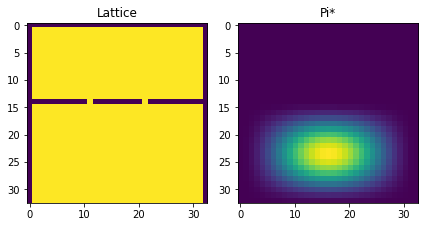

In [18]:
A = adj(size)
#A_star =
#print(A)
#A = add_defects(A, q)
A = double_slit(A)
#print(defect_A)
Lattice = adj2graph(A)

print("Symmetric:", check_symmetric(A))

diag_adj = np.diag(A)

eig_values, eig_vectors = la.eig(A)

eig_values = np.real_if_close(eig_values, tol=1)
eig_vectors = np.real_if_close(eig_vectors, tol=1)

max_Evalue = np.amax(eig_values)
max_index = np.where(eig_values == np.amax(eig_values))
max_Evector = eig_vectors.T[0]

pie_star= np.zeros((size*size))
pie_starD= np.zeros((size*size))
pie_sum=0

for i in range (size*size):
    pie_starD[i] = max_Evalue * max_Evalue
    pie_star[i]= max_Evector[i] * max_Evector[i]
    pie_sum += pie_star[i]
pie_star=np.reshape(pie_star,[size,size])
pie_starD=np.reshape(pie_starD,[size,size])

print("Pie sum:", pie_sum)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(Lattice.T)
axs[0].set_title("Lattice")
axs[1].imshow(pie_star.T)
axs[1].set_title("Pi*")
fig.tight_layout()

In [19]:
import seaborn as sns
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

#projection.append(1)
for i in range(1, n):
    #print(i)
    for j in range(0,no_walker):
        move_prob = NN_prob(int(walkers[j].walk_x[i-1]%size),int(walkers[j].walk_y[i-1]%size))
        '''connections=np.count_nonzero(move_prob)
        for j in range(4):
            if(move_prob[j] != 0): move_prob[j]=1/connections'''
        #print(move_prob)
        step = np.random.choice(direction, p=move_prob) #Randomly choosing the direction for MERW.
        #step = np.random.choice(direction)  # Randomly choosing the direction for RW.
        #print("MOVED:",step)
        if step == "R": #updating the direction with respect to the direction of motion choosen.
            walkers[j].walk_x.append(walkers[j].walk_x[i - 1] + 1)
            walkers[j].walk_y.append(walkers[j].walk_y[i - 1])
        elif step == "L":
            walkers[j].walk_x.append(walkers[j].walk_x[i - 1] - 1)
            walkers[j].walk_y.append(walkers[j].walk_y[i - 1])
        elif step == "U":
            walkers[j].walk_x.append(walkers[j].walk_x[i - 1])
            walkers[j].walk_y.append(walkers[j].walk_y[i - 1] - 1)
        else:
            walkers[j].walk_x.append(walkers[j].walk_x[i - 1])
            walkers[j].walk_y.append(walkers[j].walk_y[i - 1] + 1)
        #print(walkers[j].walk_x[i],walkers[j].walk_y[i])
    #print("----------------------------------------------")
#print(walkers[0].walk_x, walkers[1].walk_x)

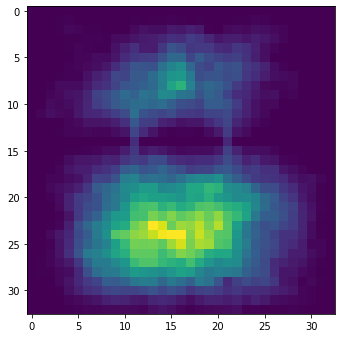

In [20]:
fig, ax = plt.subplots(1,1, figsize=[5,5])
fig.tight_layout()
lattice0= np.zeros((size,size))
lattice= np.zeros((size,size))
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
lattices = []
for t in range(n):
  for s in range(0,no_walker):
    step_x = int(walkers[s].walk_x[t] % size)
    step_y = int(walkers[s].walk_y[t] % size)
    #print(walk_x[t],walk_y[t])
    #print(step_x, step_y)
    lattice[step_x, step_y] += 0.01
  #print("++++++++++++++++")
  lat = ax.imshow(lattice, animated=True)
  if t == 0:
      ax.imshow(lattice)  # show an initial one first
  lattices.append([lat])

ani = animation.ArtistAnimation(fig,lattices, interval=25, blit=True, repeat_delay=1000)
        #print(val)'''
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
ani

In [21]:

ani = animation.ArtistAnimation(fig, lattices, blit=True, repeat_delay=1000)
        #print(val)'''

'''xs = []
ys = []
def animate(i):
    step_x = int(walk_x[i] % size)
    step_y = int(walk_y[i] % size)
    lattice[step_x, step_y] += 0.01
    xs.append(i)
    ys.append(projection[i])

    #ax.clear()
    ax[0].imshow(lattice, animated=True)
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].axes.get_yaxis().set_visible(False)
    ax[1].plot(xs, ys)
    if i == 0:
        ax[0].imshow(lattice)  # show an initial one first
    plt.xlabel('Time')
    plt.ylabel('Price')


ani = animation.FuncAnimation(fig, animate, interval=200)
'''
plt.show()

In [22]:
#tuple = (‘left’, 44.44, ‘temp’, 99.99)
#print(tuple[0])
print('abcefd'.replace('cd','12'))

abcefd
